 LGM VIP Data Science
    
 June 2022

 Beginner Level Task  01 - Iris flowers Classification ML Project
    
 Name - Praveen jha

# || Important libraries ||

In [1]:
import numpy as np  # for numerical calculations
import pandas as pd # to handle data Structures operations
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # for missing value visulations
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data set
iris_ds = pd.read_csv(r"C:\Users\DELL\Downloads\iris.data")
iris_ds.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
iris_ds.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [4]:
columns=['Sepal_length','Sepal_width','Petal_length','Petal_width','Species']

In [5]:
iris_ds.columns=columns
iris_ds.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
# Basic information about the dataset
iris_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  149 non-null    float64
 1   Sepal_width   149 non-null    float64
 2   Petal_length  149 non-null    float64
 3   Petal_width   149 non-null    float64
 4   Species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
iris_ds.describe()  # Describing Statistical data

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# count value
iris_ds['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64

In [9]:
# Finding the null value
iris_ds.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Species         0
dtype: int64

Text(0.5, 1.0, 'Matrix plot')

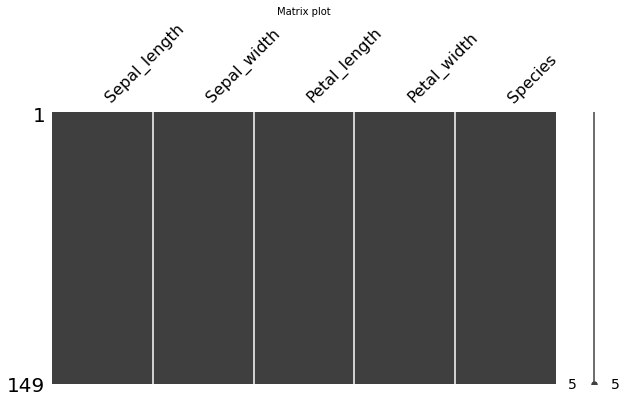

In [10]:
ms.matrix(iris_ds,figsize=(10,5))
plt.title("Matrix plot",size=10)

# || EDA ||

array([[<AxesSubplot:title={'center':'Sepal_length'}>,
        <AxesSubplot:title={'center':'Sepal_width'}>],
       [<AxesSubplot:title={'center':'Petal_length'}>,
        <AxesSubplot:title={'center':'Petal_width'}>]], dtype=object)

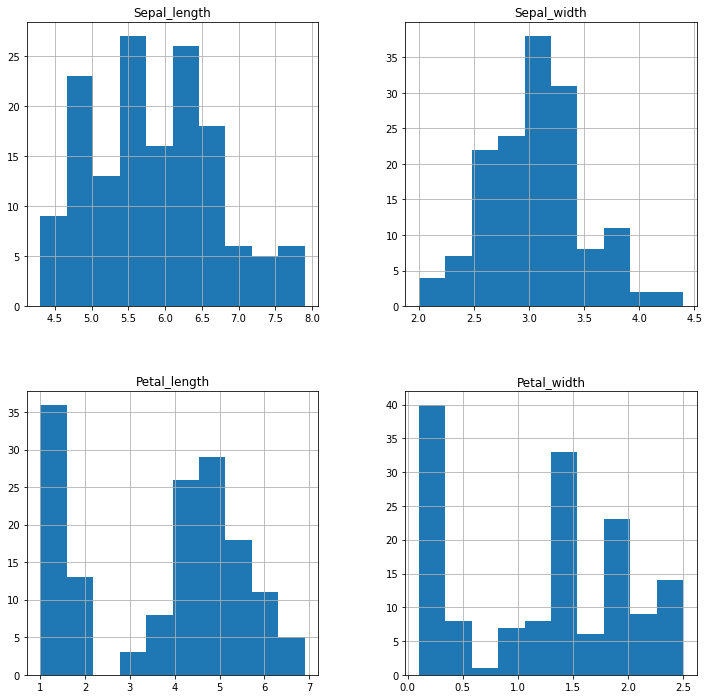

In [11]:
iris_ds.hist(figsize=(12,12))

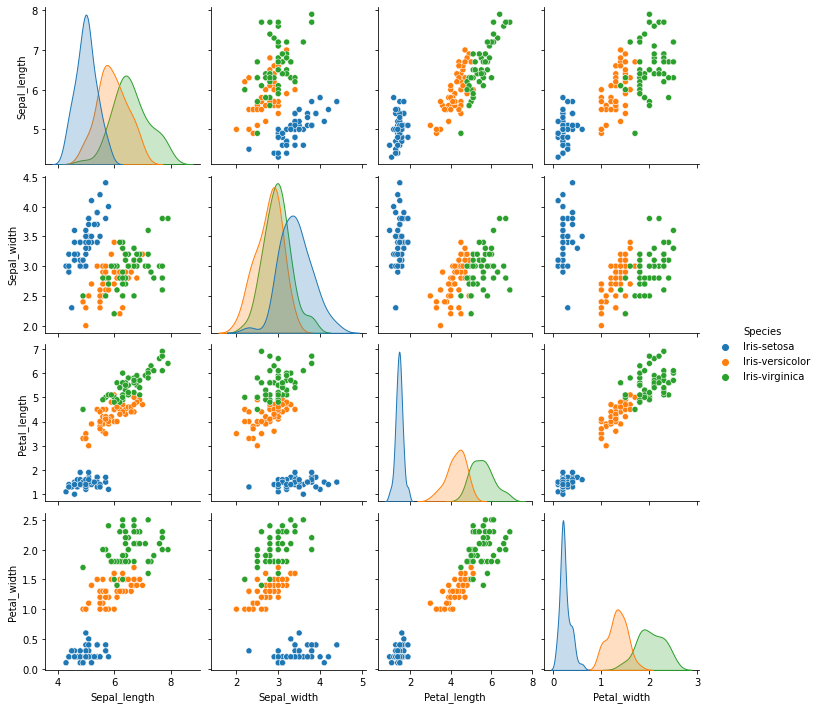

In [12]:
sns.pairplot(data = iris_ds, hue = "Species")

# || Data preparation for fitting model ||

In [13]:
from sklearn.model_selection import train_test_split    # Split data train & test
from sklearn.preprocessing import LabelEncoder          # For catogrical columns

In [14]:
lb = LabelEncoder()
iris_ds["Species"] = lb.fit_transform(iris_ds["Species"].values)

In [15]:
iris_ds.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [16]:
iris_ds.tail()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2
148,5.9,3.0,5.1,1.8,2


In [17]:
X = iris_ds.drop(columns=['Species'])
Y = iris_ds['Species']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

# || Libraries from different Machine learning model ||

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# LOGISTIC REGRESSION MODEL
l_regression = LogisticRegression()
l_regression.fit(x_train, y_train)
l_score = round(l_regression.score(x_train,y_train) * 100,2)
print("Accuracy for logistic regression model is :",l_score)


# DECISION TREE CLASSIFIER
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train, y_train)
dtree_score = round(d_tree.score(x_train,y_train) * 100,2)
print("Accuracy for Decision Tree Classifier model is :",dtree_score)


# RANDOM FOREST CLASSIFIER
r_forest = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=0)
r_forest.fit(x_train, y_train)
rf_score = round(r_forest.score(x_train,y_train) * 100,2)
print("Accuracy for Random forest model is :",rf_score)


#SVC
svc = SVC(kernel='rbf',random_state=0)
svc.fit(x_train,y_train)
svc_score = round(svc.score(x_train,y_train) * 100, 2)
print("ACCURACY FOR SVC IS:",svc_score)


# K NEAREST NEIGHBOUR
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski',p=2)
knn.fit(x_train,y_train)
knn_score = round(knn.score(x_train,y_train)* 100,2)
print("ACCURACY FOR K-NN MODEL IS ",knn_score)

Accuracy for logistic regression model is : 98.08
Accuracy for Decision Tree Classifier model is : 100.0
Accuracy for Random forest model is : 100.0
ACCURACY FOR SVC IS: 98.08
ACCURACY FOR K-NN MODEL IS  96.15


In [20]:
selection = pd.DataFrame({'Models':['Logistic','Descion tree','Random forest','Svc','KNN'],
                          'Accuracy values':[l_score,dtree_score,rf_score,svc_score,knn_score]})
selection.sort_values(by='Accuracy values',ascending=False)

,Models,Accuracy values
1,Descion tree,100.00
2,Random forest,100.00
0,Logistic,98.08
3,Svc,98.08
4,KNN,96.15


Text(0.5, 1.0, 'Bar plot for comapring score from diffrent models')

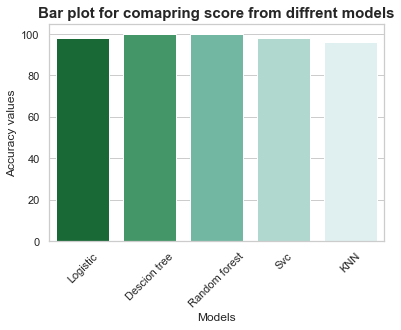

In [21]:
sns.set_theme(style='whitegrid')
sns.barplot(x='Models',y='Accuracy values',data=selection,palette='BuGn_r');
plt.xticks(rotation=45)
plt.title('Bar plot for comapring score from diffrent models',weight='bold',size=15)